In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('~/Downloads/MxMH.csv')
df.describe(include='all')
df.columns
df['Primary streaming service'] = df['Primary streaming service'].replace({
    'I do not use a streaming service.': 'None',
    'Other streaming service': 'Other'
})
df['Age Group'] = pd.cut(df['Age'],
                         bins=[0, 19, 29, 39, 49, 59, 100],
                         labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60+'])
df['Hours per day Group'] = pd.cut(df['Hours per day'],
                         bins=[0, 4, 9, 14, 19, 24],
                         labels=['0-4', '5-9', '10-14', '15-19', '20-24'])
df['Overall MH'] = df['Anxiety'] + df['Depression'] + df['OCD'] + df['Insomnia']
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Age Group,Hours per day Group,Overall MH
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.,10-19,0-4,4.0
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.,60+,0-4,12.0
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,10-19,0-4,26.0
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,9.0,7.0,3.0,3.0,Improve,I understand.,60+,0-4,22.0
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,10-19,0-4,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,7.0,6.0,0.0,9.0,Improve,I understand.,10-19,0-4,22.0
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.,10-19,0-4,12.0
733,11/3/2022 23:24:38,19.0,Other,6.0,Yes,No,Yes,Rap,Yes,No,...,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.,10-19,5-9,8.0
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.,10-19,5-9,8.0


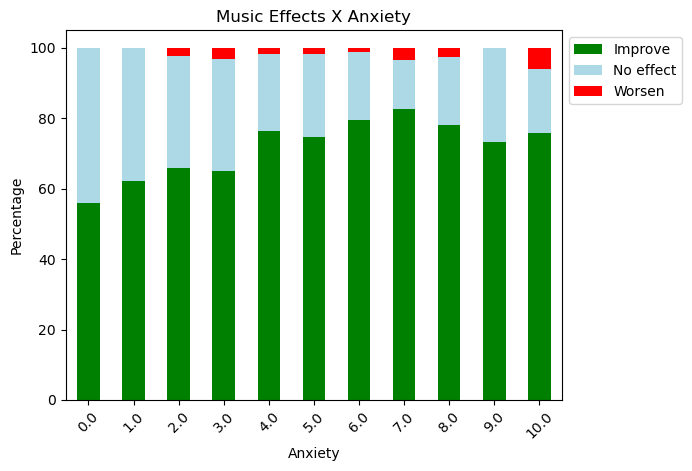

The data shows a clear positive relationship with high levels of anxiety and mental health improvement through listening to music.
There is a notable improvement of more than 75% in anxiety levels of 7 and higher.


In [3]:
colors = ['green', 'lightblue', 'red']
df_filtered = df[df['Anxiety'] % 1 == 0]  # Keep only whole numbers
crosstab = pd.crosstab(df_filtered['Anxiety'], df_filtered['Music effects'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Music Effects X Anxiety')
plt.ylabel('Percentage')
plt.show()
print('The data shows a clear positive relationship with high levels of anxiety and mental health improvement through listening to music.')
print('There is a notable improvement of more than 75% in anxiety levels of 7 and higher.')

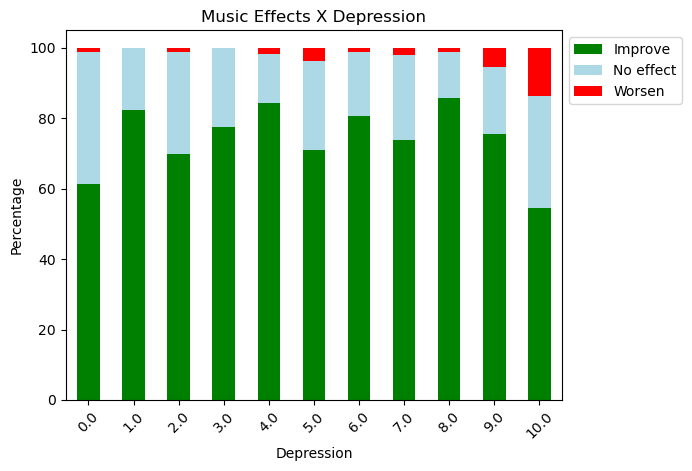

This graph shows the relationship between depression and music effects, more specifically it is showing that the higher the 
depression score, the higher likelihood of worsening effects


In [5]:
colors = ['green', 'lightblue', 'red']
df_filtered = df[df['Depression'] % 1 == 0]  # Keep only whole numbers
crosstab = pd.crosstab(df_filtered['Depression'], df_filtered['Music effects'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Music Effects X Depression')
plt.ylabel('Percentage')
plt.show()

print('This graph shows the relationship between depression and music effects, more specifically it is showing that the higher the ')
print('depression score, the higher likelihood of worsening effects')

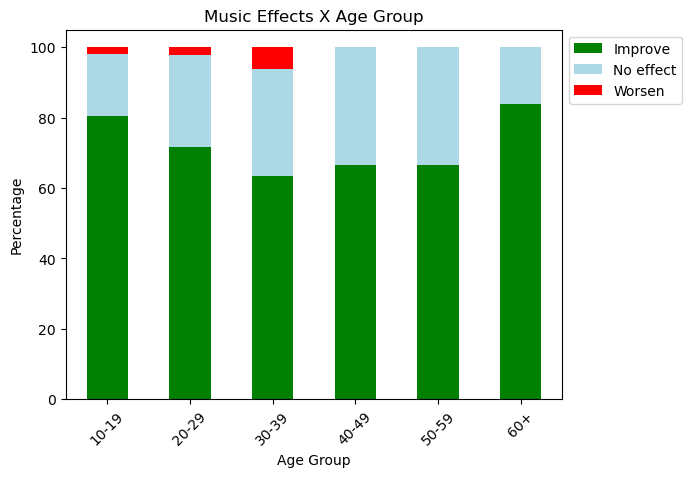

This graph shows the relationship between age group and music effects. It shows age having a negative relationship with improvement and a positive relationship with worsening effects in the 10s, 20s, and 30s
It then shows a positive relationship between age and improvement from 40s onward.


In [7]:
colors = ['green', 'lightblue', 'red']
crosstab = pd.crosstab(df['Age Group'], df['Music effects'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Music Effects X Age Group')
plt.ylabel('Percentage')
plt.show()

print('This graph shows the relationship between age group and music effects. It shows age having a negative relationship with improvement and a positive relationship with worsening effects in the 10s, 20s, and 30s')
print('It then shows a positive relationship between age and improvement from 40s onward.')

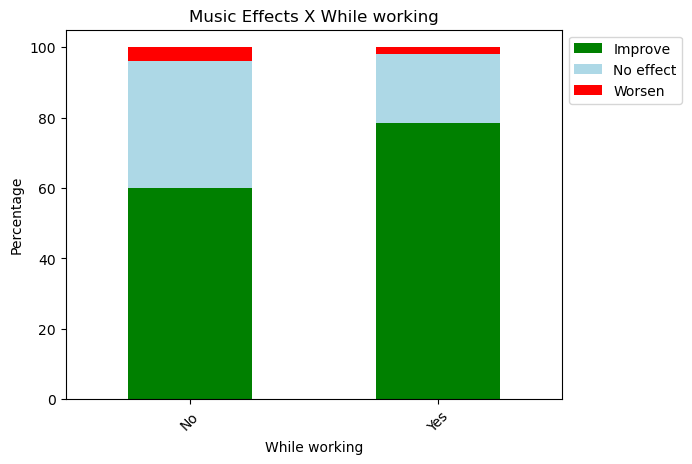

This graph shows lower percentages of people experience none and worsnening effects, and a higher percentage of people experience improvements in their mental health when listening to music while working.


In [9]:
colors = ['green', 'lightblue', 'red']
crosstab = pd.crosstab(df['While working'], df['Music effects'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Music Effects X While working')
plt.ylabel('Percentage')
plt.show()

print('This graph shows lower percentages of people experience none and worsnening effects, and a higher percentage of people experience improvements in their mental health when listening to music while working.')

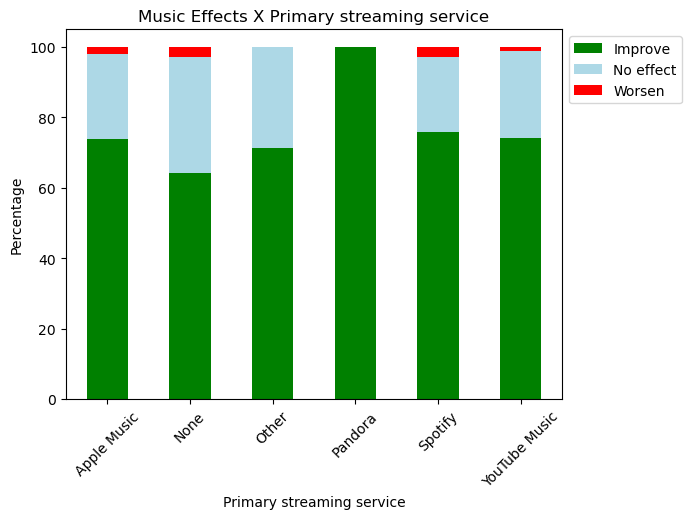

In [13]:
colors = ['green', 'lightblue', 'red']
crosstab = pd.crosstab(df['Primary streaming service'], df['Music effects'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Music Effects X Primary streaming service')
plt.ylabel('Percentage')
plt.show()

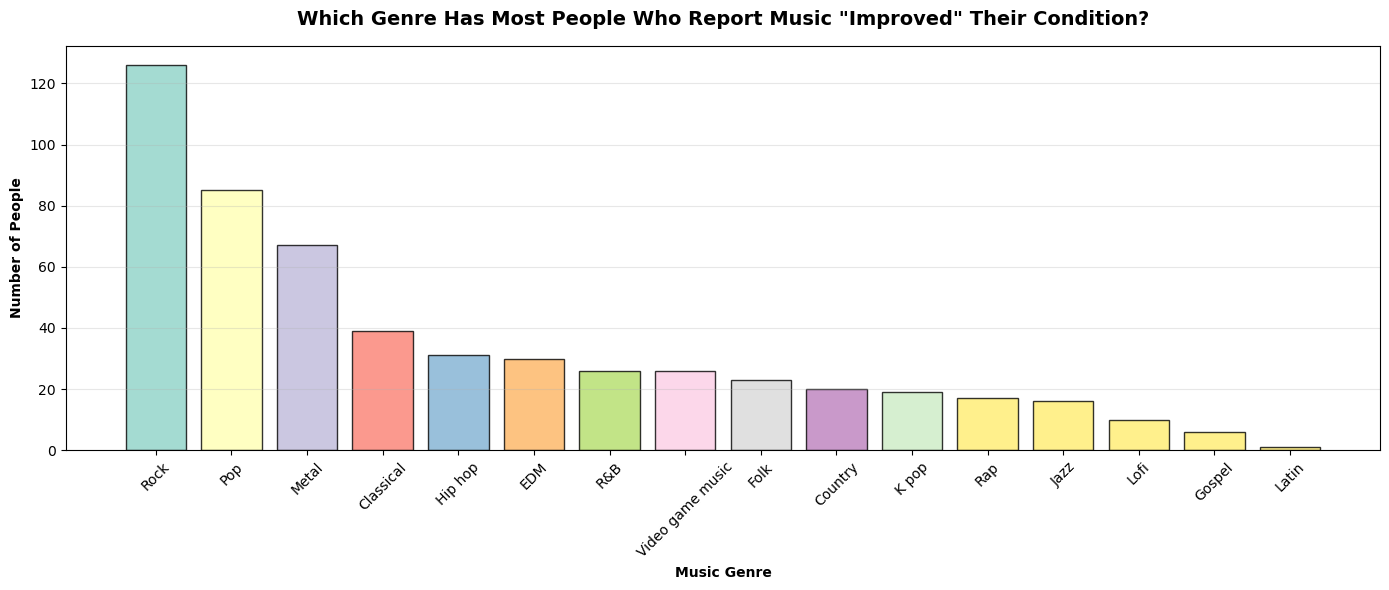

In [15]:
improved = df[df['Music effects'] == 'Improve']

fig, ax = plt.subplots(figsize=(14, 6))

genre_counts = improved['Fav genre'].value_counts()
colors = plt.cm.Set3(range(len(genre_counts)))

ax.bar(genre_counts.index, genre_counts.values, color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Music Genre', weight='bold')
ax.set_ylabel('Number of People', weight='bold')
ax.set_title('Which Genre Has Most People Who Report Music "Improved" Their Condition?', 
             fontsize=14, weight='bold', pad=15)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

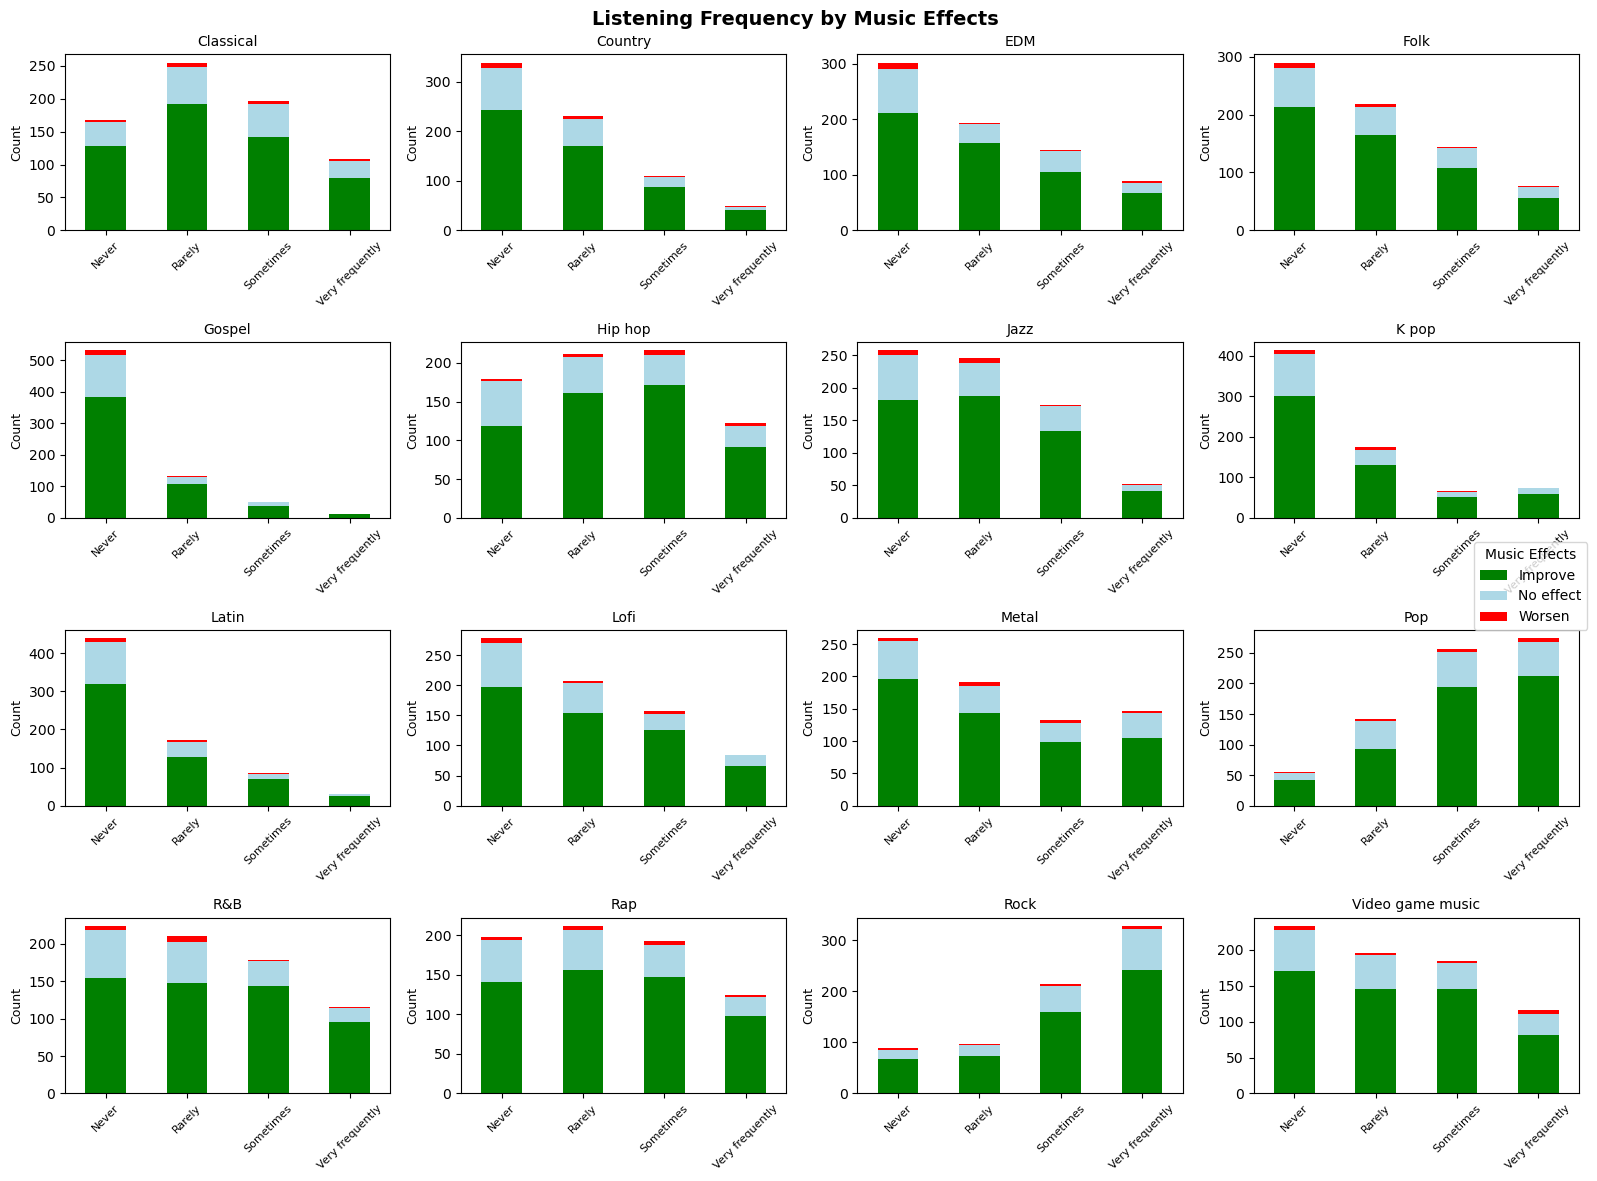

In [17]:
cols = [col for col in df.columns if 'Frequency' in col]
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

colors = ['green', 'lightblue', 'red']

for i, col in enumerate(cols):
    ax = axes[i]
    
    # Create crosstab for stacked bar
    grouped = df.groupby([col, 'Music effects']).size().unstack(fill_value=0)
    grouped.plot(kind='bar', stacked=True, ax=ax, color=colors, legend=False)
    
    ax.set_title(col.replace('Frequency [', '').replace(']', ''), fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.92, 0.5), 
          title='Music Effects')

plt.suptitle('Listening Frequency by Music Effects', fontsize=14, weight='bold')
plt.subplots_adjust(right=0.88)
plt.tight_layout()
plt.show()

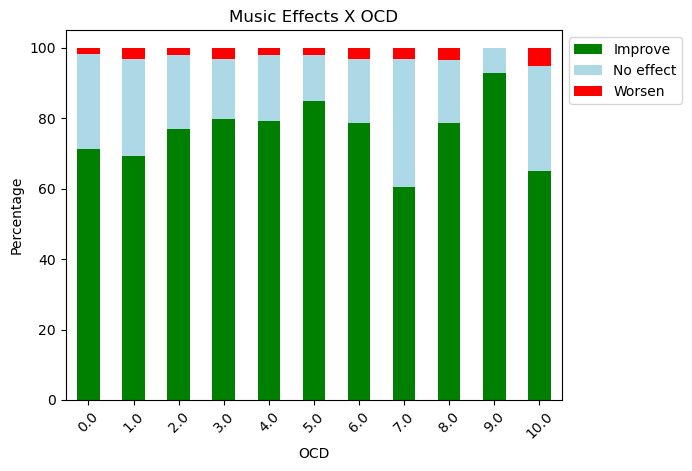

In [19]:
colors = ['green', 'lightblue', 'red']
df_filtered = df[df['OCD'] % 1 == 0]  # Keep only whole numbers
crosstab = pd.crosstab(df_filtered['OCD'], df_filtered['Music effects'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Music Effects X OCD')
plt.ylabel('Percentage')
plt.show()

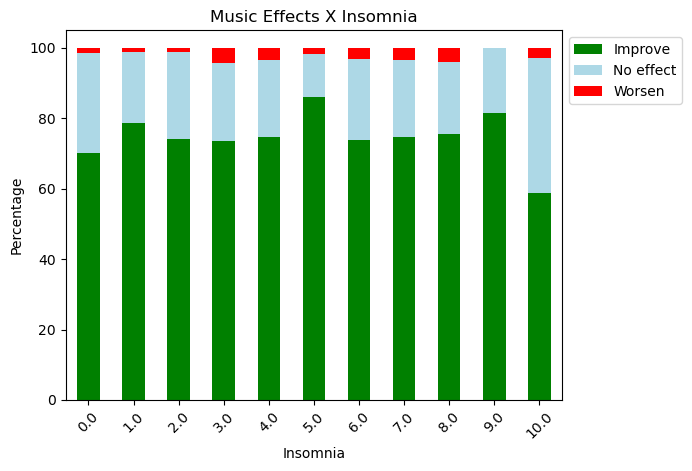

In [21]:
colors = ['green', 'lightblue', 'red']
df_filtered = df[df['Insomnia'] % 1 == 0]  # Keep only whole numbers
crosstab = pd.crosstab(df_filtered['Insomnia'], df_filtered['Music effects'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Music Effects X Insomnia')
plt.ylabel('Percentage')
plt.show()

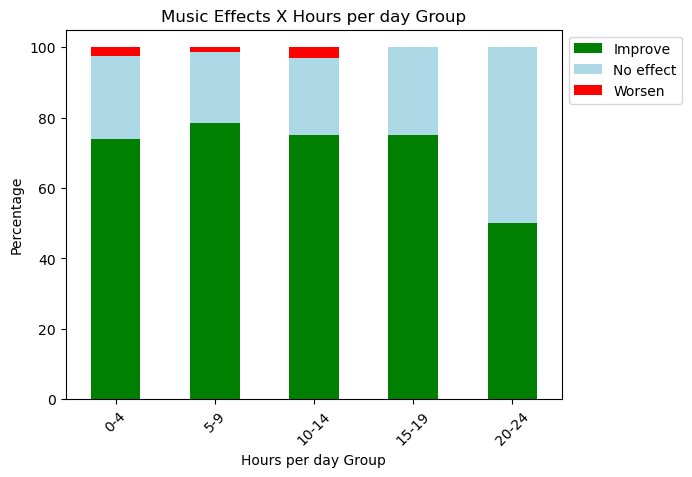

In [23]:
colors = ['green', 'lightblue', 'red']
crosstab = pd.crosstab(df['Hours per day Group'], df['Music effects'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Music Effects X Hours per day Group')
plt.ylabel('Percentage')
plt.show()

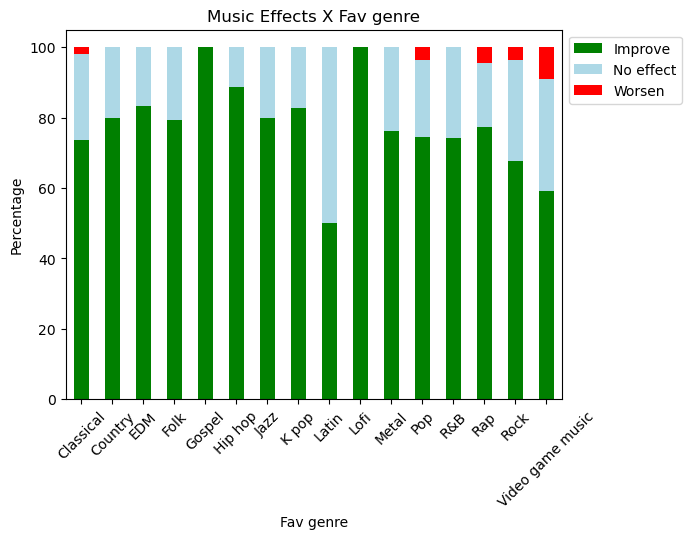

In [25]:
colors = ['green', 'lightblue', 'red']
crosstab = pd.crosstab(df['Fav genre'], df['Music effects'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Music Effects X Fav genre')
plt.ylabel('Percentage')
plt.show()